# Postprocessing of Generation results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
idx_s=231
start_id = 0
end_id = 14
var_par='t_p'
unit=' [mm]'

xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s,idx_s)
df_xy=pd.read_csv(xy_file_name)

In [3]:
df_xy

,Unnamed: 0,ID,t_p,L,b1,t_w,h_w,alpha_l,h_v,l_v,...,x_c_stresses,y_c_stresses,z_c_stresses,Location_c_stresses,eta_min_shear_reduced,x_c_shear_reduced,y_c_shear_reduced,z_c_shear_reduced,Location_c_shear_reduced,element_count_shear_reduced
0,0,0,200.000000,5800,9720,400,2780,90,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,271.428571,5800,9720,400,2780,90,0,0,...,9666.278320,200.773819,-224.223602,eta_y_bot_stresses,0.129661,9592.892308,5272.714286,0.0,bot,37.0
2,2,2,342.857143,5800,9720,400,2780,90,0,0,...,9650.161133,62.763485,-295.566498,eta_y_bot_stresses,0.320302,9554.760000,5251.500000,0.0,bot,18.0
3,3,3,414.285714,5800,9720,400,2780,90,0,0,...,9642.401367,281.083832,-365.546204,eta_y_bot_stresses,0.549079,9536.400000,5221.800000,0.0,bot,5.0
4,4,4,485.714286,5800,9720,400,2780,90,0,0,...,9642.401367,152.941177,-726.890869,eta_y_bot_stresses,1.095156,9536.400000,5221.800000,0.0,bot,0.0
5,5,5,557.142857,5800,9720,400,2780,90,0,0,...,9642.401367,152.941177,-798.319885,eta_y_bot_stresses,1.236353,9536.400000,5221.800000,0.0,bot,0.0
6,6,6,628.571429,5800,9720,400,2780,90,0,0,...,9642.401367,2593.998535,-573.109253,eta_y_top_stresses,0.418794,9536.400000,5221.800000,0.0,bot,27.0
7,7,7,700.000000,5800,9720,400,2780,90,0,0,...,9642.401367,152.941177,-941.176880,eta_y_bot_stresses,2.388209,9536.400000,5221.800000,0.0,bot,0.0
8,8,8,771.428571,5800,9720,400,2780,90,0,0,...,9642.401367,152.941177,-1012.605835,eta_y_bot_stresses,2.807309,9536.400000,5221.800000,0.0,bot,0.0
9,9,9,842.857143,5800,9720,400,2780,90,0,0,...,9642.401367,152.941177,-1084.033813,eta_y_bot_stresses,3.334299,9536.400000,5221.800000,0.0,bot,0.0


## Plot of minimal $\eta$ factors

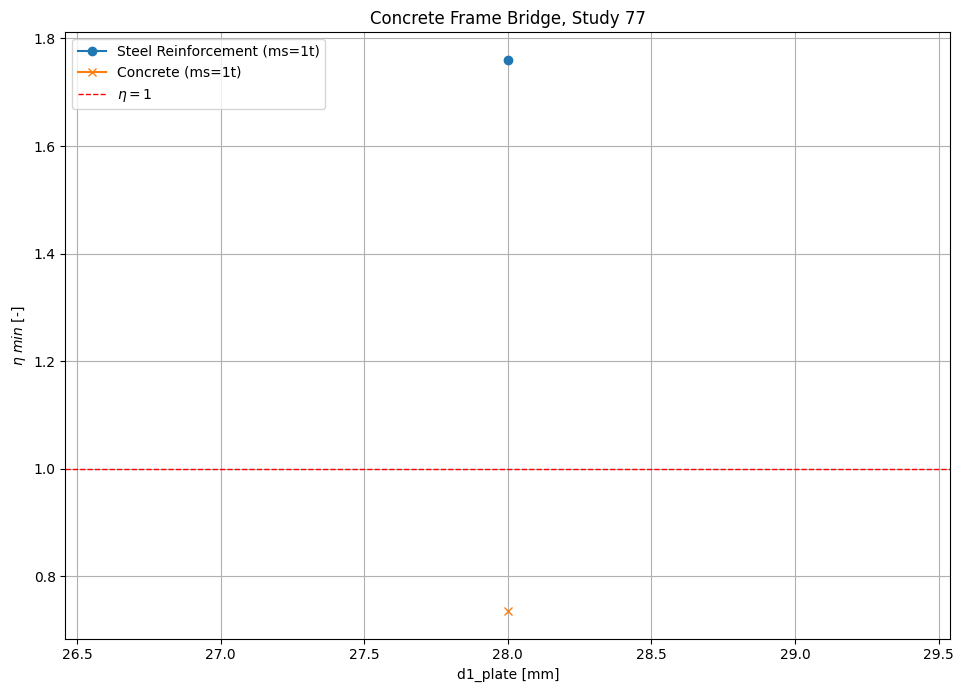

In [4]:
cm = 1/2.54
plt.figure(figsize = (29*cm, 20*cm))
plt.title('Concrete Frame Bridge, Study {}'.format(idx_s))
plt.plot(df_xy[var_par], df_xy['eta_min_s'],label='Steel Reinforcement (ms=1t)', marker='o')
plt.plot(df_xy[var_par], df_xy['eta_min_c'], label='Concrete (ms=1t)', marker='x')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\eta=1$')
plt.xlabel(var_par+unit)
plt.ylabel('$\eta \ min$ [-]')
plt.grid()
plt.legend(loc = "upper left")

## 3D plot of most critical point

### Bridge as a surface

In [28]:
# extract information about the bridge that we need to plot the bridge

ID=13

t_p=df_xy['t_p'][ID]
L=df_xy['L'][ID]
b=df_xy['b1'][ID]
h_w=df_xy['h_w'][ID]
h=h_w+t_p

x_s=df_xy['x_s'][ID]
y_s=df_xy['y_s'][ID]
z_s=df_xy['z_s'][ID]
layer=df_xy['Location_s'][ID]
eta_s=df_xy['eta_min_s'][ID]

x_c=df_xy['x_c'][ID]
y_c=df_xy['y_c'][ID]
z_c=df_xy['z_c'][ID]
location=df_xy['Location_c'][ID]
eta_c=df_xy['eta_min_c'][ID]

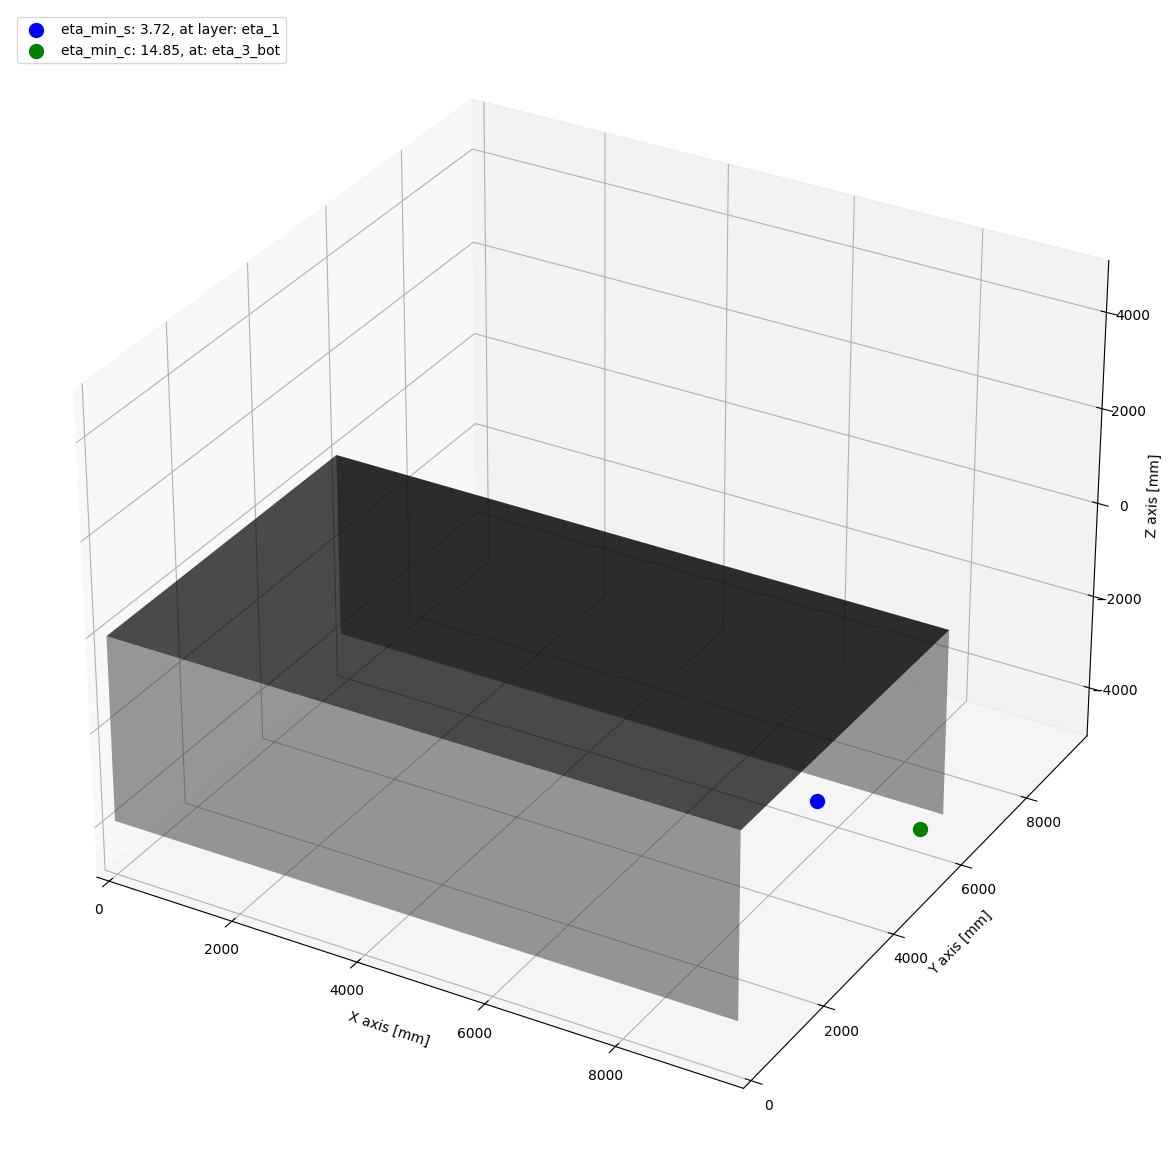

In [29]:
from mpl_toolkits.mplot3d import Axes3D

cm = 1/2.54

# Creating a grid of values for plotting
x = np.linspace(0, b, 100)
y = np.linspace(0, L, 100)
x_p, y_p = np.meshgrid(x, y)
z_p = 0*x_p*y_p

z= np.linspace(0, -h, 100)
x_w, z_w = np.meshgrid(x, z)
y_w1=0*x*z
y_w2=L+0*x*z

# Creating a 3D plot
fig = plt.figure(figsize = (30*cm, 30*cm))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surfaces
ax.plot_surface(x_p, y_p, z_p, alpha=0.7, rstride=100, cstride=100, color='black')
ax.plot_surface(x_w, y_w1, z_w, alpha=0.5, rstride=100, cstride=100, color='gray')
ax.plot_surface(x_w, y_w2, z_w, alpha=0.5, rstride=100, cstride=100, color='gray')



# Plotting the specific point
ax.scatter(x_s, y_s, z_s, color='blue', s=100, label='eta_min_s: {:0.2f}, at layer: {}'.format(eta_s, layer)) 
ax.scatter(x_c, y_c, z_c, color='green', s=100, label='eta_min_c: {:0.2f}, at: {}'.format(eta_c, location)) 

# Setting labels
ax.set_xlabel('X axis [mm]')
ax.set_ylabel('Y axis [mm]')
ax.set_zlabel('Z axis [mm]')
ax.legend(loc='upper left') 

# Calculate aspect ratio
max_range = np.array([x_w.max()-x_w.min(), y_p.max()-y_p.min(), z_w.max()-z_w.min()]).max()


ax.set_xlim(0,max_range)
ax.set_ylim(0,max_range)
ax.set_zlim(-max_range/2,max_range/2)

fig.tight_layout()


In [30]:
figname='critical_point_{}_Batch_{}_{}'.format(var_par,idx_s,ID)
fig_folder_path="D:/ETHZ/IBK-SBB/VII. 1D Paramterstudie Geometrie/Images/Critical position/"

fig.savefig(fig_folder_path+figname+".png")

### Bridge as a volume

In [77]:
# extract information about the bridge that we need to plot the bridge

ID=13

t_w=df_xy["t_w"][ID]

t_p=df_xy['t_p'][ID]
L=df_xy['L'][ID]
b=df_xy['b1'][ID]
h_w=df_xy['h_w'][ID]
h=h_w+t_p

x_s=df_xy['x_s'][ID]
y_s=df_xy['y_s'][ID]
z_s=df_xy['z_s'][ID]
layer=df_xy['Location_s'][ID]
eta_s=df_xy['eta_min_s'][ID]

x_c=df_xy['x_c'][ID]
y_c=df_xy['y_c'][ID]
z_c=df_xy['z_c'][ID]
location=df_xy['Location_c'][ID]
eta_c=df_xy['eta_min_c'][ID]

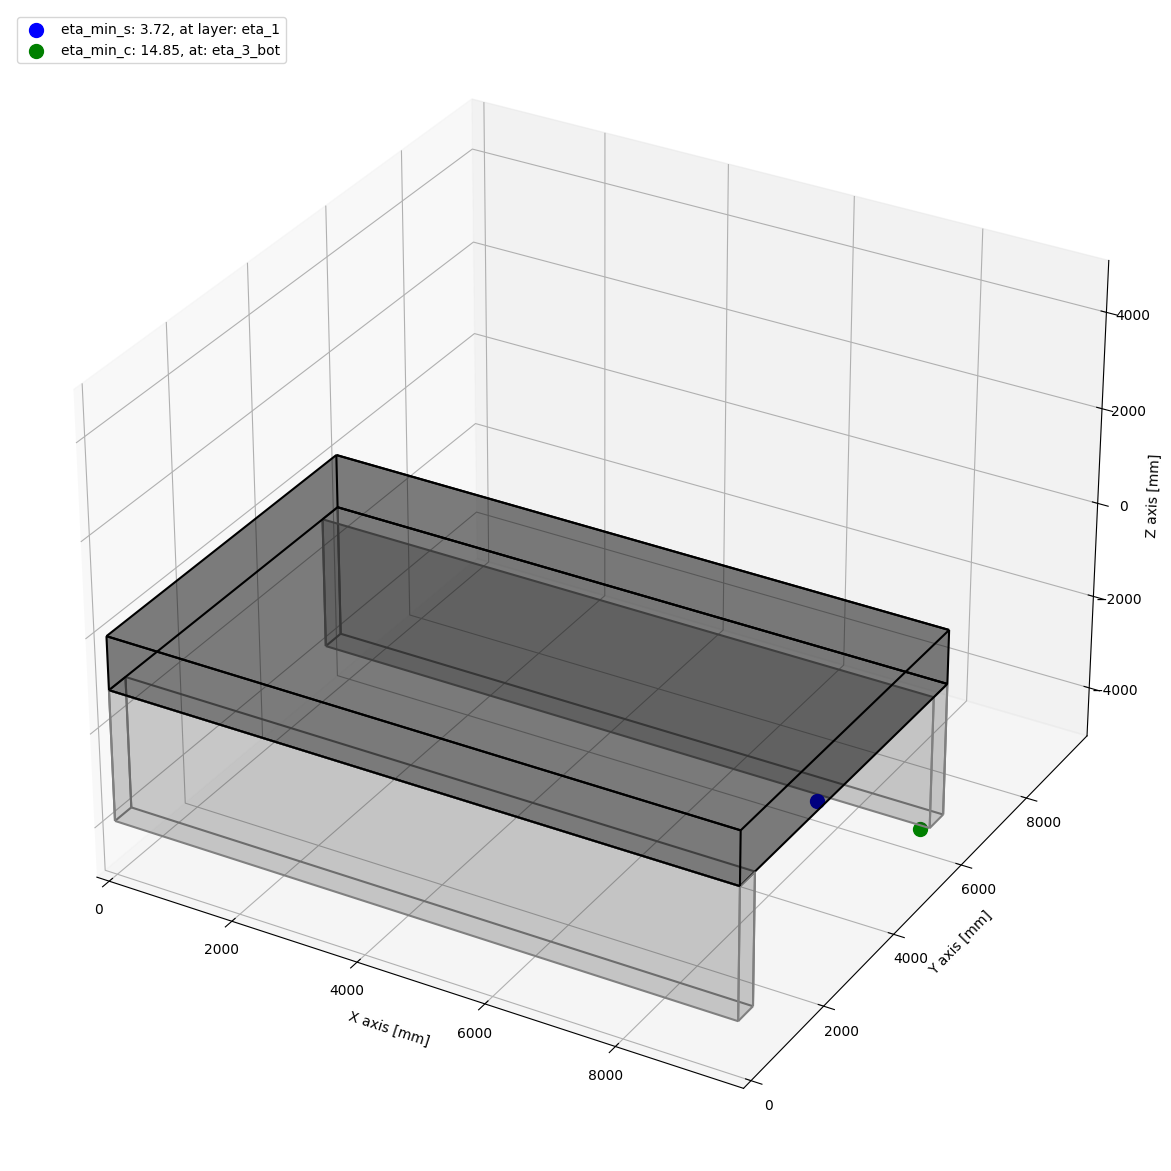

In [78]:
from mpl_toolkits.mplot3d import Axes3D

cm = 1/2.54

# Creating a grid of values for plotting
x = np.linspace(0, b, 100)
y = np.linspace(0, L, 100)
x_p, y_p = np.meshgrid(x, y)
z_p = 0*x_p*y_p

z= np.linspace(0, -h_w, 100)
x_w, z_w = np.meshgrid(x, z)
y_w1=0*x*z
y_w2=L+0*x*z

# Creating a 3D plot
fig = plt.figure(figsize = (30*cm, 30*cm))
ax = fig.add_subplot(111, projection='3d')

# Closing surfaces
zpc1 = np.linspace(0, -t_p, 100)
x_pc1, z_pc1 = np.meshgrid(x, zpc1)

y_pc2, z_pc2 = np.meshgrid(y, zpc1)
x_pc2 = 0*z_pc2+b

yw1c = np.linspace(0, -t_w, 100)
y_w1c, z_w1c = np.meshgrid(yw1c, z)

####################################################################################################################
#Surfaces
####################################################################################################################

#Plate
ax.plot_surface(x_p, y_p, z_p, rstride=100, cstride=100, color=('black',0.5)) 
ax.plot_surface(x_w, y_w1, z_pc1, rstride=100, cstride=100, color=('black',0.5))
ax.plot_surface(x_pc2, y_pc2, z_pc2, rstride=100, cstride=100, color=('black',0.5))

#Wall 1
ax.plot_surface(x_w, y_w1, z_w-t_p, rstride=100, cstride=100, color=('gray',0.25))
ax.plot_surface(x_pc2, y_w1c+t_w, z_w1c-t_p, rstride=100, cstride=100, color=('gray',0.25))

#Wall 2
ax.plot_surface(x_w, y_w2-t_w, z_w-t_p, rstride=100, cstride=100, color=('gray',0.25))
ax.plot_surface(x_pc2, y_w1c+L, z_w1c-t_p, rstride=100, cstride=100, color=('gray',0.25))

####################################################################################################################
#Wireframe
####################################################################################################################

#Plate
ax.plot_wireframe(x_p, y_p, z_p, rstride=100, cstride=100, color='black')
ax.plot_wireframe(x_p, y_p, z_p-t_p, rstride=100, cstride=100, color='black')
ax.plot_wireframe(x_w, y_w1, z_pc1, rstride=100, cstride=100, color='black')
ax.plot_wireframe(x_w, y_w2, z_pc1, rstride=100, cstride=100, color='black')

#Wall 1
ax.plot_wireframe(x_w, y_w1, z_w-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_w, y_w1+t_w, z_w-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_pc2, y_w1c+t_w, z_w1c-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_pc2*0, y_w1c+t_w, z_w1c-t_p, rstride=100, cstride=100, color="gray")

#Walls 2
ax.plot_wireframe(x_w, y_w2, z_w-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_w, y_w2-t_w, z_w-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_pc2, y_w1c+L, z_w1c-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_pc2*0, y_w1c+L, z_w1c-t_p, rstride=100, cstride=100, color="gray")


# Plotting the specific point
ax.scatter(x_s, y_s, z_s, color='blue', s=100, label='eta_min_s: {:0.2f}, at layer: {}'.format(eta_s, layer)) 
ax.scatter(x_c, y_c, z_c, color='green', s=100, label='eta_min_c: {:0.2f}, at: {}'.format(eta_c, location)) 

# Setting labels
ax.set_xlabel('X axis [mm]')
ax.set_ylabel('Y axis [mm]')
ax.set_zlabel('Z axis [mm]')
ax.legend(loc='upper left') 

# Calculate aspect ratio
max_range = np.array([x_w.max()-x_w.min(), y_p.max()-y_p.min(), z_w.max()-z_w.min()]).max()


ax.set_xlim(0,max_range)
ax.set_ylim(0,max_range)
ax.set_zlim(-max_range/2,max_range/2)

fig.tight_layout()

In [79]:
figname='birdge_as_volume_critical_point_{}_Batch_{}_{}'.format(var_par,idx_s,ID)
fig_folder_path="D:/ETHZ/IBK-SBB/VII. 1D Paramterstudie Geometrie/Images/Critical position/"

fig.savefig(fig_folder_path+figname+".png")